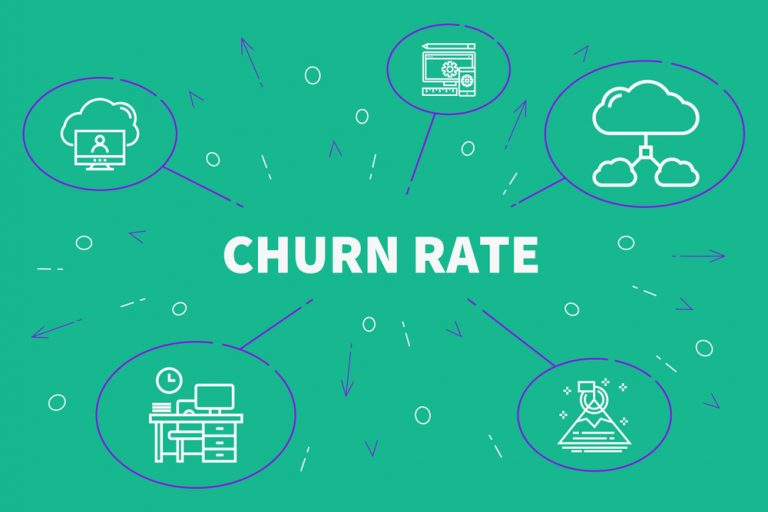

 O enunciado deste projeto a seguir é completamente fictício, a empresa, o contexto, o CFO, as perguntas de negócio existem somente na minha imaginação de forma didática.


**O BravBank é um banco situado na Espanha. Com 20 anos de atuação no mercado financeiro. Seu modelo de negócio é conectar pessoas que possuem dinheiro e desejam poupá-lo, investi-lo ou simplesmente guardá-lo com pessoas que necessitam dos recursos e, portanto, os tomarão emprestados.**

# **O problema de negócio :**

 **Em pouco mais de 1 ano de operação, o time de finanças percebeu que alguns clientes da sua base estavam cancelando suas contas e saindo do banco. E isto estava fazendo o banco perder dinheiro e seus principais ativos que são seus clientes.**
**Baseado nesta ocorrência o CFO quer saber se é possível descobrir com certa assertividade quais clientes irão sair ou não do banco para que o time de finanças possa lançar um novo produto para os clientes da sua base, com o intuito de retê-los na instituição. Mais eles não tem conhecimento avançado de análise de dados, para saber quais clientes irão sair ou não do banco.(Churn rate).
Por este motivo foi solicitado ao time de dados a identificação destes clientes.**

# **O desafio**

 **O Eric foi o escalado do time de dados para solucionar o problema que foi solicitado para determinar quais clientes irão sair ou não do banco. Utilizando uma análise preditiva e prescritiva. A fim de entregar uma solução que ajude o time de finanças na hora da tomada de decisão de criar um produto que retenha os clientes na instituição.**

**Como resultado para esse projeto é esperado que Eric entregue uma lista de clientes que vão sair ou não do banco e suas respectivas probabilidades de evasão a partir das características contidas na base.**

 **▪ O VALOR PERDIDO PELO BANCO COM A SAÍDA DOS CLIENTES :**

**▪Estudando o modelo de negócio e dialogando com o time de finanças pude identificar que o banco ganha dinheiro sobre seus clientes através de tarifas bancárias.**
 
**▪Tarifas bancárias são um valor que o banco cobra aos seus clientes por um serviço prestado. As principais tarifas bancárias estão na emissão de folhas de cheque, fornecimento de segunda via de cartão, extrato impresso, manutenção de conta corrente, anuidade do cartão de crédito e até mesmo saques bancários.**
 
**■ Sabendo que foram perdidos 2037 clientes, o time de finanças contabilizou as tarifas pagas por estes respectivos clientes, e identificaram que estas tarifas totalizavam ($ 200.000,00 dólares).**

# **Roteiro da solução :**
 
**- Utilizarei o ambiente de codificação em nuvem Google Colaboratory.**
 
**- Utilizarei a linguagem de programação Python para a manipulação, análise de dados, modelagem de dados e modelagem estatística.**
 
**- Trabalharei a técnica de balanceamento de classe sobreamostragem.**
 
**- Utilizarei técnicas de escalonamento para padronizar ou normalizar os dados e facilitar o aprendizado do algoritmo.**
 
**- Utilizarei a técnica de validação cruzada para validar o modelo e identificar da melhor forma possível como o modelo irá generalizar com dados em produção.**
 
**- Utilizarei o algoritmo de machine learning para modelar o fenômeno e identificar os clientes que irão sair ou não do banco e suas respectivas probabilidades de ocorrência.**
 
**- Utilizarei as melhores métricas de avaliação de algoritmo de acordo ao modelo do negócio trabalhado, para validar a performance do modelo.**
 
**- Selecionarei o melhor modelo e o salvarei.**
 
**- Traduzirei a performance obtida pelo modelo em valor de negócio.**
 
**- Entregarei os resultados obtidos em uma planilha relacional e uma API que servirá para o usuário fazer as predições de forma autônoma.**

# **Dicionário de dados :**
 
**RowNumber:** número do índice da tabela
 
**CustomerId:** identificação do cliente
 
**Surname:** sobrenome do cliente
 
**CreditScore:** pontuação de credito, 0 alto risco de inadimplência e 1000, clientes com baixo risco de inadimplência
 
**Geography:** país que o serviço é oferecido
 
**Gender:** sexo do cliente
 
**Age:** idade do cleinte
 
**Tenure:** um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.
 
**Balance:** saldo da conta corrente
 
**NumOfProducts:** número de produtos bancários adquiridos
 
**HasCrCard:** se tem cartão de credito ou não, (Sim = 1 e Não = 0)
 
**IsActiveMember:** se é um cliente com conta ativa, (Ativo = 1)
 
**EstimatedSalary:** salário estimado
 
**Exited:** cliente deixou de ser cliente do banco ou não (Churn = 1).
 
**Fonte dos dados encontra-se aqui :** [Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

# **Caixa de ferramentas**

In [ ]:
# Manipulação de tabelas 
import pandas as pd 
 
# Álgebra linear 
import numpy as np
 
# Visualização de dados 
import matplotlib.pyplot as plt
 
# Balanceamento de classes 
from imblearn.over_sampling  import SMOTE 
 
# Pré-processamento de dados
from sklearn.preprocessing   import MinMaxScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer
 
 
# Modelagem, validação cruzada 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold    
 
# Métricas de avaliação
from sklearn.metrics         import classification_report, confusion_matrix
 
# Visualização de métricas de avaliação
from yellowbrick.classifier           import ConfusionMatrix, ClassificationReport, ROCAUC
 
# Algoritmo
from sklearn.ensemble import RandomForestClassifier
 
# Serializador de salvamento
import pickle

# **Extração**

In [ ]:
# carrega dataframe 
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv",usecols=[3,4,5,6,7,8,9,10,11,12,13])
# ler os primeiros registros
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Transformação**

**Modelagem de dados**

In [ ]:
# Seleção dos atributos 
X = df.iloc[:,0:10]
y = df.iloc[:,10]
 
# Transforma variáveis categóricas em numéricas 
encoder = ColumnTransformer(transformers=[("OneHot",OneHotEncoder(), [1,2])], remainder="passthrough")
X = encoder.fit_transform(X)
 
# Aplica sobreamostragem para balancer as classes 
oversampling = SMOTE()
X_over, y_over = oversampling.fit_sample(X,y)
 
# Separa os dados em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=42)
 
# Normaliza os dados para uma escala entre (0 e 1), para facilitar o aprendizado do algoritmo
# define o scaler
scaler = MinMaxScaler()
# fit nos dados de treino
scaler.fit(X_train)
# scaler transformação nos dados de treino 
X_train = scaler.transform(X_train)
# scaler transformação nos dados de validação 
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Aplicação do algoritmo**

In [ ]:
# Instânciando o modelo 
model = RandomForestClassifier(class_weight= "balanced_subsample",                               criterion= "gini",
                               max_features= "auto",
                               min_samples_leaf= 1,
                               n_estimators= 500,
                               random_state= 42
)
                      
# Validação cruzada estratificada
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        
# Cálculo da validação pela métrica ROC_AUC, (nos dados de validação) 
auc = cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=skfold, n_jobs=-1)
 
# Treina os modelos 
model.fit(X_train, y_train)
        
# Faz predições
yhat = model.predict(X_test)
 
# Exibe as métricas 
print(f"AUC_CV: {auc.mean():.4f} STD: {auc.std():.2f}",end="\n\n")
print(f"{classification_report(y_test, yhat)}")
print(f"{confusion_matrix(y_test, yhat)}")

AUC_CV: 0.9481 STD: 0.01

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.95      0.87      0.91      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186

[[1514   79]
 [ 211 1382]]


**Avaliação do modelo**

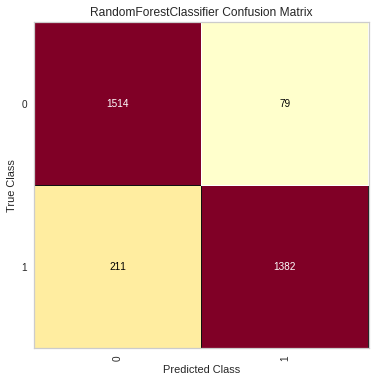

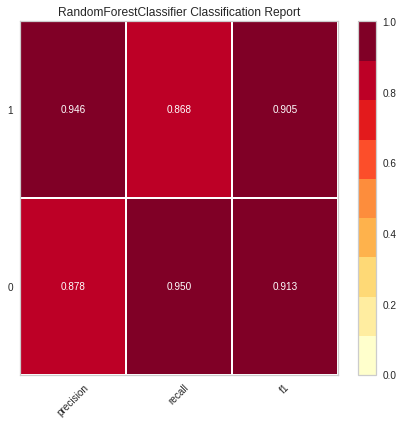

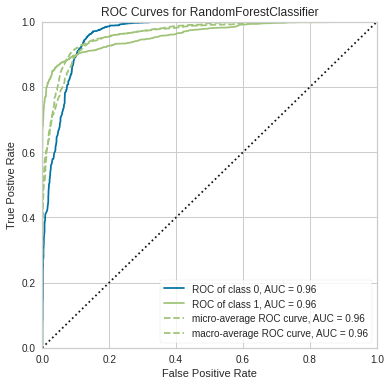

In [ ]:
# Visualização das métricas de avaliação do modelo
 
# Matriz de confusão 
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(model)
cm_viz.score(X_test, y_test)
cm_viz.poof()
 
# Reportagem de classificação 
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ClassificationReport(model)
cm_viz.score(X_test, y_test)
cm_viz.poof()
 
# Área sobre a curva ROC
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ROCAUC(model)
cm_viz.score(X_test, y_test)
cm_viz.poof()

# **Tradução da performance do modelo para receita do negócio :**

**Valor perdido pelo banco com 2037 clientes que sairam = $ 200.000,00**
_______________________________________
**Taxa de acerto do modelo para classe que diz que o cliente vai sair = 87%**
_______________________________________
**Taxa de erro do modelo para classe que diz que o cliente vai sair = 13%**
_______________________________________
**Taxa de acerto do modelo para classe que diz que o cliente vai ficar = 95%**
_______________________________________
**Taxa de erro do modelo para classe que diz que o cliente vai ficar = 5%**
_______________________________________
**Taxa de confiança nas previsões do modelo quanto ao cliente sair do banco = 95%**
_______________________________________
**Taxa de confiança quando ao modelo prever que o cliente vai ficar no banco = 88%**

In [50]:
# Cálculo da receita que o modelo gerará com sua performance atual
 
# (c) clientes_churn = 2037
 
# (t) taxa_erro = 13   (porque o recall para classe 1(saída) é 87% de acerto, logo 13% de erro)
 
# (p) perda_inicial = 200.000 (valor que o banco havia perdido quando tive contato com o problema)
 
prejuizo_erro = lambda c,t,p: (c*t)/100 *(p)
print(f"Valor de prejuízo do modelo quanto ao seu erro de 13% nas previsões da classe (vai sair): ${prejuizo_erro(2.037,13,200.000):.3f}")

Valor de prejuízo do modelo quanto ao seu erro de 13% nas previsões da classe (vai sair): $52.962


In [ ]:
# Cálculo da taxa de acerto, conforme o erro, onde a questão é subtrair todo valor perdido inicialmente pelo valor de erro do modelo 
 
# (p) perda inicial 
 
# (pj_erro) prejuízo_erro
 
lucro_acerto = lambda p, pj_erro: (p - pj_erro)
 
print(f"Valor de lucro do modelo quanto ao seu acerto de 87% nas previsões da classe (vai sair): ${lucro_acerto(200.000,52.962):.3f}")

Valor de lucro do modelo quanto ao seu acerto de 87% nas previsões da classe (vai sair): $147.038


**INSIGHT: De (100%) dos clientes que têm pretensão de sair do banco, o modelo consegue identificar (87%), onde essas previsões diminuem o prejuízo inicial do banco de ( 200.000 dólares ) para ( 52.962 dólares ) em outras palavras o banco diminui suas perdas iniciais em (147.038 dólares).**

# **Carga**

**Salvamento do modelo**

In [ ]:
# salva o modelo e os pré-processadores 
 
with open("pipeline_model.pkl","wb") as f:
    pickle.dump([encoder, scaler, model],f)

In [ ]:
# Carregando os pré-processadores e o modelo 
 
with open("pipeline_model.pkl","rb") as f:
    onehot, min_max, modelo = pickle.load(f)

**Teste no modelo com novos dados**

In [ ]:
# Selecionei cliente que saiu do banco para testar o modelo 
# Selecionei o cliente do índice 2, que realmente saiu do banco, lembrando que a coluna alvo não deve estar nesta seleção.
 
cliente_novo = df.iloc[2:3,0:10]
cliente_novo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2,502,France,Female,42,8,159660.8,3,1,0,113931.57


In [ ]:
# Aplica encoding nos dados, transformar dado categórico em numérico
cliente_novo = onehot.transform(cliente_novo)
 
# Trás os dados para uma escala normal entre 0 e 1
cliente_novo = min_max.transform(cliente_novo)
cliente_novo = pd.DataFrame(cliente_novo)

In [ ]:
# Os dados tratados do novo cliente
 
cliente_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,0.0,0.304,0.324324,0.8,0.642227,0.666667,1.0,0.0,0.569654


In [ ]:
# previsão 
    
if modelo.predict(cliente_novo) == 1:
    print(f"Cliente vai sair !")
else :
    print(f"Cliente vai ficar !")
 
 
# Probabilidade da predição 
 
for i in modelo.predict_proba(cliente_novo):
    print(f"probabilidade de ficar: {i[0]}")
    print(f"probabilidade de sair: {i[1]}")

Cliente vai sair !
probabilidade de ficar: 0.048
probabilidade de sair: 0.952
